# Hierarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [4]:
df = pd.read_csv('alena.csv')
df['level CGPA']=np.where (df['CGPA']<=8.0,0,1)

In [5]:
df


,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,level CGPA
0,1,337,4.770685,1.386294,4.5,9.65,1,0.92,1
1,2,324,4.672829,1.386294,4.5,8.87,1,0.76,1
2,3,316,4.644391,1.098612,3.5,8.00,1,0.72,0
3,4,322,4.700480,1.098612,2.5,8.67,1,0.80,1
4,5,314,4.634729,0.693147,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...
395,396,324,4.700480,1.098612,3.5,9.04,1,0.82,1
396,397,325,4.672829,1.098612,3.5,9.11,1,0.84,1
397,398,330,4.753590,1.386294,4.5,9.45,1,0.91,1
398,399,312,4.634729,1.098612,4.0,8.78,0,0.67,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'level CGPA']).round()

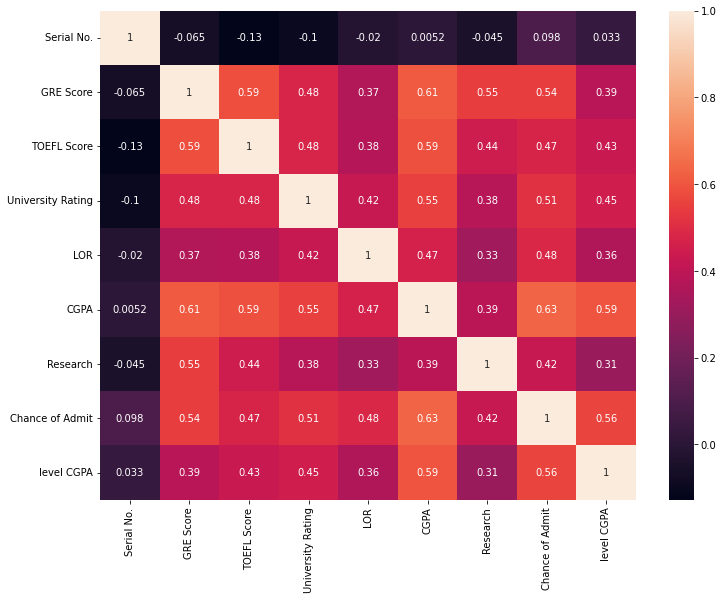

In [7]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Number of clusters

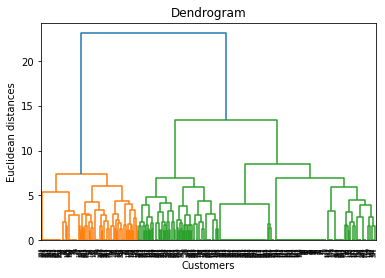

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Baseline model

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [10]:
hc

array([0, 0, 2, 0, 1, 0, 2, 4, 4, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 1, 2, 0, 0, 0, 0, 1, 4, 4, 4, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 4, 1, 2, 2, 1, 1, 4, 4, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 4, 4, 1, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 4, 1, 1, 4, 1, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 2, 1, 1, 4, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 2, 1, 1, 4, 4, 4, 0, 2, 0, 0, 1, 1, 4, 4, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 2, 4, 4, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 3, 3, 3, 3, 2, 4, 4, 1,
       0, 0, 2, 0, 2, 2, 3, 3, 3, 2, 3, 3, 0, 2, 2, 3, 3, 3, 3, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 1, 4, 4, 1, 4, 0, 3, 2, 2, 2, 2, 3, 2, 0, 3, 3,
       3, 3, 2, 2, 4, 4, 4, 1, 1, 2, 2, 0, 3, 2, 1,

# Feature Reduction

In [11]:
X = df.iloc[:, [1, 2, 8]]

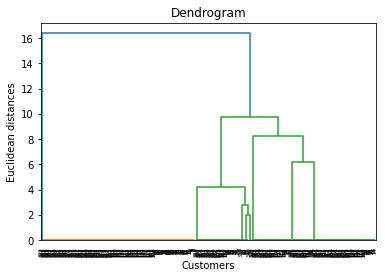

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 1

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

# Pickle results

In [14]:
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()